In [4]:
# 📌 Feature Engineering Pipeline (Titanic Example)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load dataset
train = pd.read_csv("/kaggle/input/datasssss/train.csv")
test = pd.read_csv("/kaggle/input/datasssss/test.csv")
gender_submission = pd.read_csv("/kaggle/input/datasssss/gender_submission.csv")

# 2. Split features (X) and target (y)
X = train.drop("Survived", axis=1)
y = train["Survived"]

# 3. Define numerical and categorical columns
num_cols = ["Age", "Fare"]
cat_cols = ["Sex", "Embarked", "Pclass"]  # Pclass is categorical, not continuous

# 4. Preprocessing pipelines
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols)
])

# 5. Build full pipeline with classifier
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=500))
])

# 6. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 7. Fit & evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.770949720670391


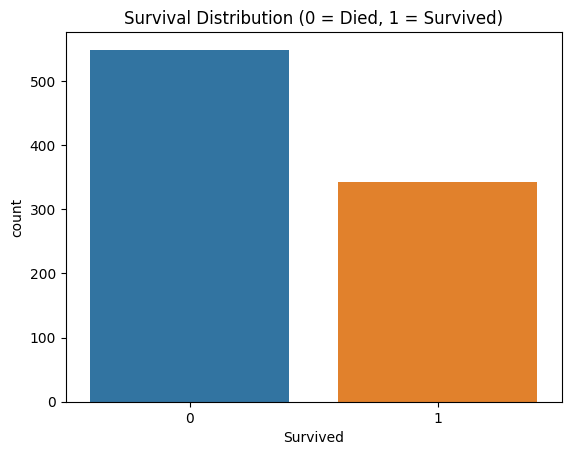

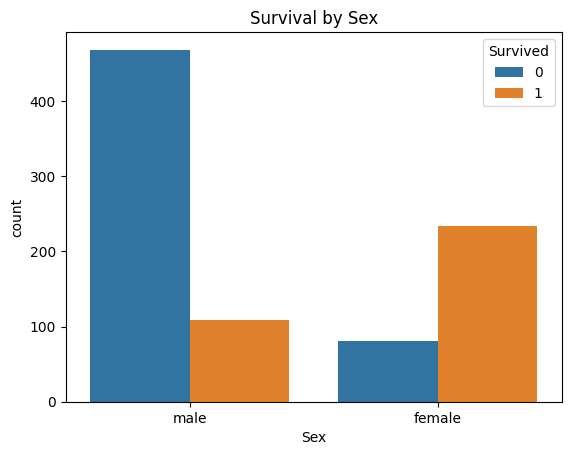

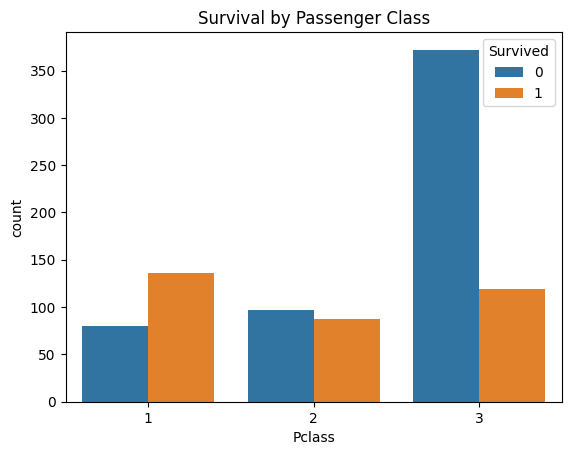

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


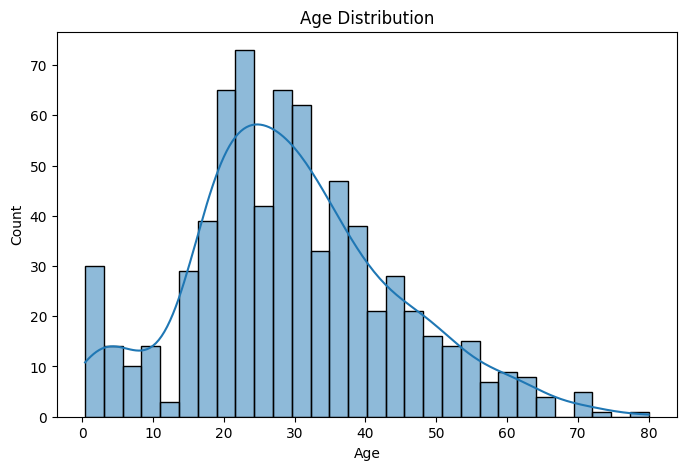

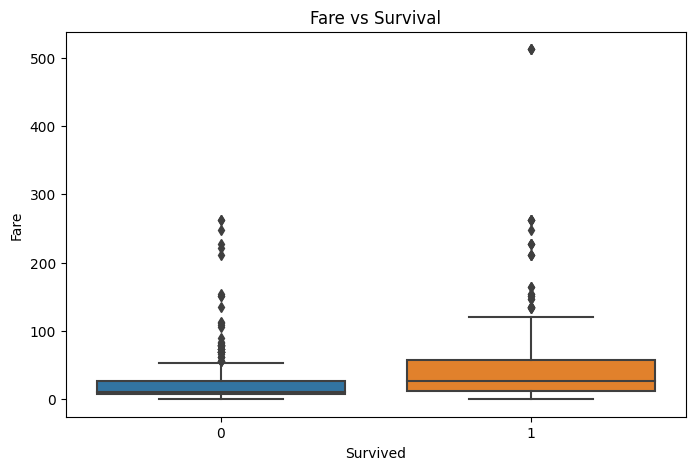

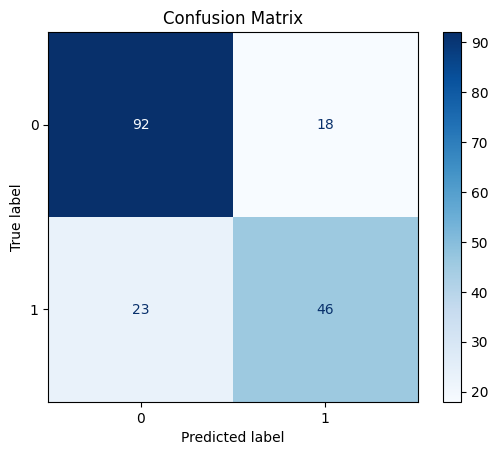

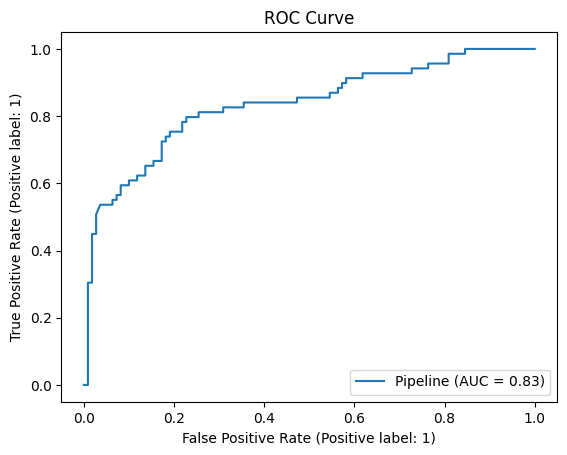

In [5]:
# ---------------------------
# 1. Import plotting libraries
# ---------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 2. Explore target variable
# ---------------------------
sns.countplot(x="Survived", data=train)
plt.title("Survival Distribution (0 = Died, 1 = Survived)")
plt.show()

# ---------------------------
# 3. Explore categorical features
# ---------------------------
sns.countplot(x="Sex", hue="Survived", data=train)
plt.title("Survival by Sex")
plt.show()

sns.countplot(x="Pclass", hue="Survived", data=train)
plt.title("Survival by Passenger Class")
plt.show()

# ---------------------------
# 4. Explore numerical features
# ---------------------------
plt.figure(figsize=(8,5))
sns.histplot(train["Age"].dropna(), kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Fare", data=train)
plt.title("Fare vs Survival")
plt.show()

# ---------------------------
# 5. Model Evaluation Graph
# ---------------------------
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# After predictions:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()
